In [250]:
#import all the necessary python libraries
from __future__ import division
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from datetime import datetime, timedelta

%matplotlib inline
#import chart_studio.plotly.plotly as py
# import plotly.offline as pyoff
# import plotly.graph_objs as go
import seaborn as sns
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


Load and explore the dataset

In [251]:
#load data set
bankdata_df = pd.read_csv(r"https://firststorages.blob.core.windows.net/firstcontainer/Churn_Modelling.csv")

bankdata_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [252]:
#check the dataset shape

bankdata_df.shape

(10000, 14)

In [253]:
#check the dataset type
bankdata_df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Clean the data and replace values where necessary

In [254]:
#check for missing values
bankdata_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [255]:
#get the unique count of each column
bankdata_df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [256]:
#check describe the dataset
bankdata_df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [257]:
# Describing the categorical columns
bankdata_df.describe(include=[object])

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [258]:
#our data set has no null values 

#print out the columns
print(bankdata_df.columns.values.tolist())

['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [259]:
#from the above printed columns, RowNumbe, CustomerId, Surname does not have effect on customers leaving the bank
#hence i will drop these columns for effeciency
bankdata_df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1, inplace=True)


Let's do some exploratory data analysis on the given dataset

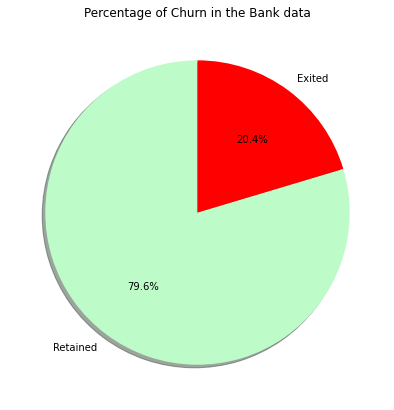

In [260]:
#plot the Churn(Exited) column to know the percentage of customers who have exited or not
labels = 'Retained', 'Exited'
plot_pie = bankdata_df['Exited'].value_counts(sort = True)
pie_color = ["#BDFCC9","#FF0000"]
rcParams['figure.figsize'] = 7,7
plt.pie(plot_pie, colors=pie_color, autopct='%1.1f%%', shadow=True, startangle=90, labels=labels)
plt.title('Percentage of Churn in the Bank data')
plt.show()

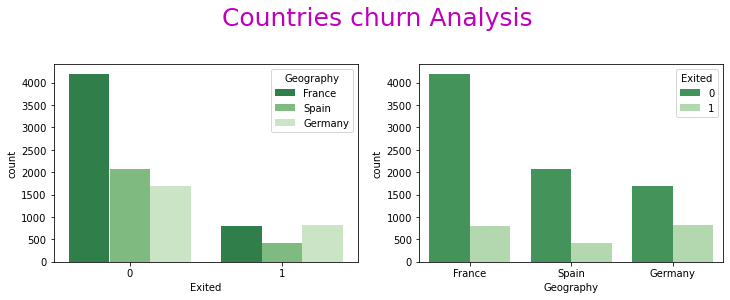

In [261]:
#from our pie chart it is shown that 20.4 % of customers left the bank.

#lets plot the all the columns in the data set to know the ones that has direct effect on customer churn
plt.figure(figsize=(12,8))
plt.suptitle("Countries churn Analysis", size = 25, fontname = "Times New Roman", color = "m")

# First Plot
plt.subplot(2, 2, 1)
sns.countplot(x ='Exited', hue = "Geography", data = bankdata_df, palette = 'Greens_r',)

# 2nd Plot
plt.subplot(2, 2, 2)
sns.countplot(x='Geography', hue='Exited', data=bankdata_df, palette="Greens_r")

#from the country plot below, the country with fewer customers may likely not have good customer service or experience
#or the not enough customer service allocated to the country

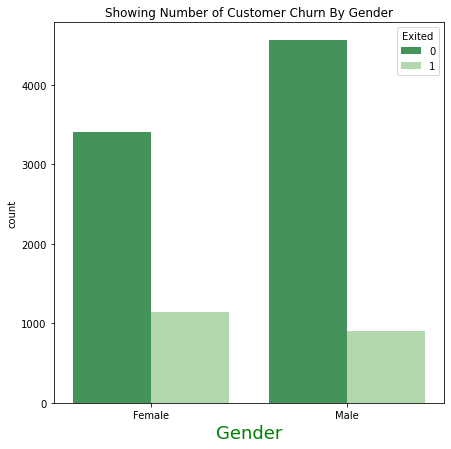

In [262]:
sns.countplot(x ='Gender', hue = "Exited", data = bankdata_df, palette = 'Greens_r', )
plt.title("Showing Number of Customer Churn By Gender")
plt.xlabel("Gender", size = 18, fontname = "DejaVu Sans", color = "g")
plt.show()

#We have more Male customers than females and female customers exited the bank are more than the male customers
#leaving the bank

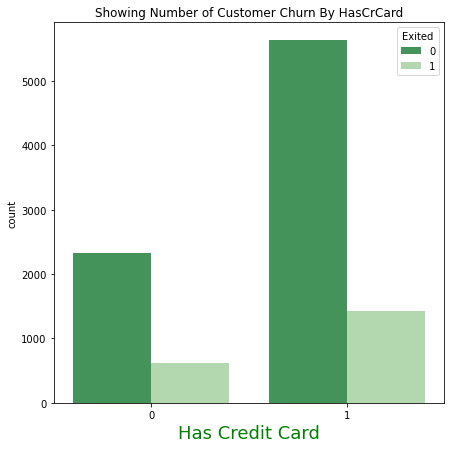

In [263]:
sns.countplot(x ='HasCrCard', hue = "Exited", data = bankdata_df, palette = 'Greens_r', )
plt.title("Showing Number of Customer Churn By HasCrCard")
plt.xlabel("Has Credit Card", size = 18, fontname = "Times New Roman", color = "g")
plt.show()

#large number of people exiting the bank are those with credit card

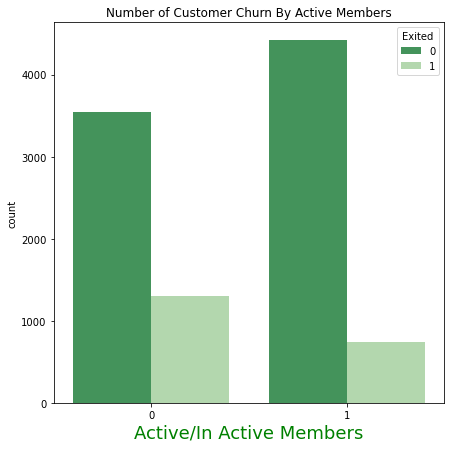

In [264]:
sns.countplot(x ='IsActiveMember', hue = "Exited", data = bankdata_df, palette = 'Greens_r', )
plt.title("Number of Customer Churn By Active Members")
plt.xlabel("Active/In Active Members", size = 18, fontname = "Times New Roman", color = "g")

plt.show()

#increasing number of people that churn are those inactive members, the bank may need to implement a policy or campaign 
#to engage such customers

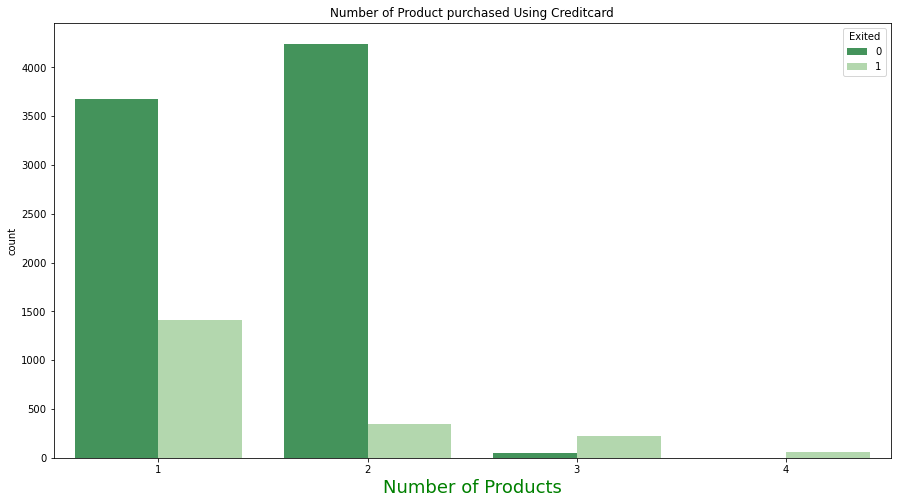

In [265]:
# number of products purchase using credit card
plt.figure(figsize=(15,8))
sns.countplot(x ='NumOfProducts', hue = "Exited", data = bankdata_df, palette = 'Greens_r')
plt.title("Number of Product purchased Using Creditcard")
plt.xlabel("Number of Products", size = 18, fontname = "Times New Roman", color = "g")

plt.show()

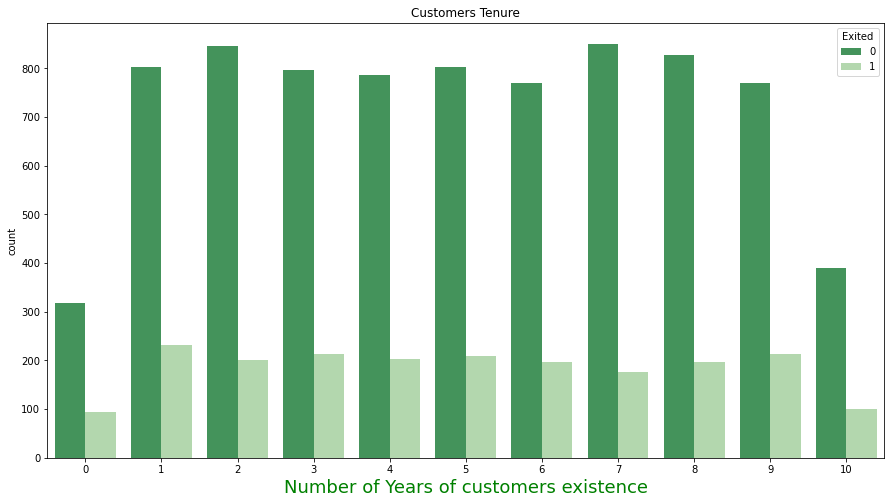

In [266]:
# plot the years of customers tenure with the bank
plt.figure(figsize=(15,8))
sns.countplot(x ='Tenure', hue = "Exited", data = bankdata_df, palette = 'Greens_r')
plt.title("Customers Tenure")
plt.xlabel("Number of Years of customers existence", size = 18, fontname = "Times New Roman", color = "g")

plt.show()

# Analaysis

In [267]:
#segmentation by age group

#maximum age operating with the bank
print("Maximum age is :", bankdata_df.Age.max(),"Years old")

Maximum age is : 92 Years old


In [268]:
#we can create an age group for the bank customers

# Create age group/bracet
bankdata_df['AgeBracket'] = pd.cut(bankdata_df.Age, 
                           bins = [16, 24, 64, 120],
                           labels=["Youth", "Adult", "Old"])

# change the data type to string
bankdata_df['AgeBracket'] = bankdata_df.AgeBracket.astype(str)
bankdata_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeBracket
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Adult
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Adult
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Adult
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Adult
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Adult


In [269]:
# Query the data frame to create age group
youth = bankdata_df.query('Age >= 16 and Age <= 24')
adult = bankdata_df.query('Age >= 25 and Age <= 64')
old = bankdata_df.query('Age >= 65')

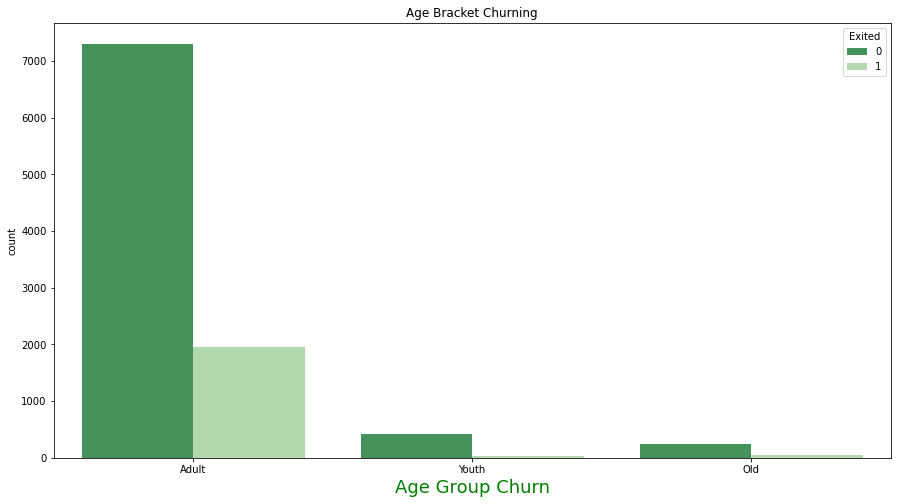

In [270]:
# plot the years of customers tenure with the bank
plt.figure(figsize=(15,8))
sns.countplot(x ='AgeBracket', hue = "Exited", data = bankdata_df, palette = 'Greens_r')
plt.title("Age Bracket Churning")
plt.xlabel("Age Group Churn", size = 18, fontname = "Times New Roman", color = "g")

plt.show()

In [271]:
#get the total number of exited customers

total_exited = bankdata_df.query('Exited == 1').count()["Exited"]

#Number of youth exiting the bank
NumberofYouthChurn = bankdata_df.query('AgeBracket == "Youth" & Exited == 1').count()["Exited"]

# youth %
YouthChurnRate = (NumberofYouthChurn/total_exited)*100


#Number of Adult exiting the bank
NumberofAdultChurn = bankdata_df.query('AgeBracket == "Adult" & Exited == 1').count()["Exited"]

# adult %
AdultChurnRate = (NumberofAdultChurn/total_exited)*100

#Number of old exiting the bank
NumberofOldChurn = bankdata_df.query('AgeBracket == "Old" & Exited == 1').count()["Exited"]

# old %
OldChurnRate = (NumberofOldChurn/total_exited)*100

age_churn_number = [['Youth', NumberofYouthChurn, YouthChurnRate ], 
                    ['Adult', NumberofAdultChurn, AdultChurnRate], ['Old', NumberofOldChurn , OldChurnRate]]

pd.DataFrame(age_churn_number, columns = ["Age Group", "Churn per Group", "Churn Rate(%)"])

,Age Group,Churn per Group,Churn Rate(%)
0,Youth,40,1.963672
1,Adult,1954,95.925380
2,Old,43,2.110947


Exited customers by gender in countries

In [272]:
#Exited analysis in each country base on gender segmentation
grouped_df = bankdata_df.groupby(["Gender","Exited", "Geography"]).count()

#covert the grouped data into pandas dataframe 
segments = pd.DataFrame(grouped_df["Age"])

# we rename the columns
segments.columns = ["Count"]

#Total number of exited females
f = segments.query('Gender == "Female" and Exited == 1')

# total number of exited males
m = segments.query('Gender == "Male" and Exited == 1')



# Set Stylers
f_styles = f.style.set_table_attributes("style='display:inline'").set_caption("Females")
m_styles = m.style.set_table_attributes("style='display:inline'").set_caption("Males")

# First Import display_html
from IPython.display import display_html 

# Output the tables
display_html(f_styles._repr_html_(),raw=True)


display_html(m_styles._repr_html_(),raw=True)


Females Count Gender Exited Geography 
 
 Female 
 1 
 France 
 460 
 
 
 Germany 
 448 
 
 
 Spain 
 231

Males Count Gender Exited Geography 
 
 Male 
 1 
 France 
 350 
 
 
 Germany 
 366 
 
 
 Spain 
 182

Retained customers by gender in each country

In [273]:
#Retained analysis in each country base on gender segmentation
grouped_df = bankdata_df.groupby(["Gender","Exited", "Geography"]).count()

#covert the grouped data into pandas dataframe 
segments = pd.DataFrame(grouped_df["Age"])

# we rename the columns
segments.columns = ["Count"]

#Total number of exited females
f = segments.query('Gender == "Female" and Exited == 0')

# total number of exited males
m = segments.query('Gender == "Male" and Exited == 0')



# Set Stylers
f_styles = f.style.set_table_attributes("style='display:inline'").set_caption("Females")
m_styles = m.style.set_table_attributes("style='display:inline'").set_caption("Males")

# First Import display_html
from IPython.display import display_html 

# Output the tables
display_html(f_styles._repr_html_(),raw=True)


display_html(m_styles._repr_html_(),raw=True)

Females Count Gender Exited Geography 
 
 Female 
 0 
 France 
 1801 
 
 
 Germany 
 745 
 
 
 Spain 
 858

Males Count Gender Exited Geography 
 
 Male 
 0 
 France 
 2403 
 
 
 Germany 
 950 
 
 
 Spain 
 1206

# Build Machine Learning Models

In [274]:
#droup age brackt as this is not necessary
bankdata_df.drop(["AgeBracket"], axis=1, inplace=True)
bankdata_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [275]:
#convert the categorical column to variables known as dummy by turning all the rows to column
bankdata_df = pd.get_dummies(bankdata_df, columns=['Geography', 'Gender'])
bankdata_df.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [276]:
#bankdata_df["CreditScore"].plot(kind='bar')

In [277]:
#normalize the dataset for inbalance

# column = "CreditScore"
# column1 = "Balance"
# column2 = "EstimatedSalary"
# # apply normalization techniques by Column 1
# bankdata_df[column] = (bankdata_df[column] - bankdata_df[column].min()) / (bankdata_df[column].max() - bankdata_df[column].min())    
# bankdata_df[column1] = (bankdata_df[column1] - bankdata_df[column1].min()) / (bankdata_df[column1].max() - bankdata_df[column1].min())
# bankdata_df[column2] = (bankdata_df[column2] - bankdata_df[column2].min()) / (bankdata_df[column2].max() - bankdata_df[column2].min())    
 
#view normalized data
bankdata_df.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [278]:
X = bankdata_df.drop(["Exited"], axis=True)
# X = bankdata_df.iloc[:,:-1].values
# Y = bankdata_df.iloc[:,-6].values
Y = bankdata_df["Exited"]

In [279]:
X.shape

(10000, 13)

In [280]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [281]:
x_test.shape[0]

2000

In [282]:
 from sklearn import preprocessing

Logistic regression

In [283]:
#call logistic regression
model_l = LogisticRegression()

# fit the model
model_l.fit(x_train, y_train)

# Predition on test data
y_predict = model_l.predict(x_test)

# Model Evaluation - Accuracy Score
model_score = accuracy_score(y_predict, y_test)
model_score

0.8005

Random Forest Classifer

In [284]:
# Call random forest classifier
model_rf = RandomForestClassifier(n_estimators = 120, criterion = 'entropy', random_state = 13,)

# fit the model
model_rf.fit(x_train, y_train)

# Predition on test data
y_pred = model_rf.predict(x_test)

# Model Evaluation - Accuracy Score
model_score = accuracy_score(y_pred, y_test)
model_score

0.869

In [285]:
y_pred = model_rf.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 1])

In [286]:
from sklearn.metrics import roc_auc_score
probabilities = model_rf.predict_proba(x_test)

#ROC AUC score from the probabilities using scikit-learn's
roc_auc_score(y_test, probabilities[:, 1])

0.8575491132149263

In [287]:
from sklearn.metrics import confusion_matrix

#calaculate the confusion matrix
confusion_matrix(y_test, y_pred)

#from the below out put of our prediction shows that the first row will predict how many customers will be retained 
#the second array first column shows that 208 customers were predict incorrectly to be retained and second column predicted 
#correctly to have exited

array([[1553,   54],
       [ 208,  185]])

In [288]:
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score

# train_predictions = model_rf.predict(x_train)
# print(precision_score(y_train, train_predictions))

# recall_score(y_train, train_predictions)

In [289]:
df = pd.DataFrame({})
df["Prediction"] = y_pred

#count the numbers of retained and exited customers in our prediction
df['Prediction'].value_counts()


0    1761
1     239
Name: Prediction, dtype: int64

In [290]:
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred, y_test))

[[1553  208]
 [  54  185]]
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      1761
           1       0.47      0.77      0.59       239

    accuracy                           0.87      2000
   macro avg       0.72      0.83      0.75      2000
weighted avg       0.91      0.87      0.88      2000

0.869


In [218]:
from keras.models import Sequential, load_model
from keras import layers
from keras.layers.core import Dropout
from keras.callbacks import ModelCheckpoint

In [219]:
# instantiate Neural networks Model
nn = Sequential()

# Build up layer structure and compile model
Input_Shape = x_train.shape[1]
nn.add(layers.Dense(1024, input_shape=(Input_Shape,), activation = 'relu'))
nn.add(Dropout(0.2))
nn.add(layers.Dense(1024, activation='relu'))
nn.add(Dropout(0.2))
nn.add(layers.Dense(1, activation='sigmoid'))
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
nn.summary



<bound method Network.summary of <keras.engine.sequential.Sequential object at 0x7ff1f04f8c18>>

In [220]:
# Set Callback to Store Model with best validation Accuracy During Training
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy',  verbose=0, save_best_only=True)



In [221]:
# Train Model and Store Best Performing Version
nn.fit(x_train, y_train, epochs=10, verbose=False, validation_data=(x_test, y_test),
               batch_size=32, callbacks=[mc])


In [134]:
load_model('best_model.h5')

In [135]:
accuracy = nn.evaluate(x_test, y_test, verbose = False)
accuracy[1]

0.8034999966621399

In [136]:
predictions = nn.predict_classes(x_test)


In [291]:

import azureml.core


# Check core SDK version number.
print('SDK version:', azureml.core.VERSION)

SDK version: 1.27.0


In [292]:

from azureml.core import Workspace


ws = Workspace.from_config()
print(ws.name, ws.resource_group, ws.location, ws.subscription_id, sep='\n')

ml-models
firstresource
eastus
2b0cab8f-c0cb-4530-b8a1-753f9a6c3035


In [293]:
ws = Workspace.get(name="ml-models", subscription_id='2b0cab8f-c0cb-4530-b8a1-753f9a6c3035', resource_group='firstresource')

In [294]:
import joblib
# os.makedirs("outputs", exist_ok=True)
joblib.dump(model_rf, 'sklearn_regression_model.pkl')

['sklearn_regression_model.pkl']

In [295]:



SampleInput = x_test.iloc[::]

# SampleInput = np.array([[619, 42, 0.00, 1, 1, 1, 101348.88, 1,0,0,1,0]])

type(SampleInput)

pandas.core.frame.DataFrame

In [296]:
SampleOutput = y_test.iloc[::]
type(SampleOutput)

pandas.core.series.Series

In [2]:
a = pd.DataFrame({})
a["Exited"] = y_test
b = pd.DataFrame(x_test)
a["Changed_values"] = y_test


a['Changed_values'] = a['Changed_values'].map({0:False,
                             1:True}
                             )


In [1]:
import sklearn
# from inference_schema.schema_decorators import input_schema, output_schema
# from inference_schema.parameter_types.numpy_parameter_type import NumpyParameterType

from azureml.core import Model
from azureml.core.resource_configuration import ResourceConfiguration


model = Model.register(workspace=ws,
                       model_name='my-sklearn-model',                # Name of the registered model in your workspace.
                       model_path='./sklearn_regression_model.pkl',  # Local file to upload and register as a model.
                       model_framework=Model.Framework.SCIKITLEARN,  # Framework used to create the model.
                       model_framework_version=sklearn.__version__,  # Version of scikit-learn used to create the model.
                       sample_input_dataset=b,
                       sample_output_dataset=x.all()
                      )

print('Name:', model.name)
print('Version:', model.version)

In [241]:
#test the model created
test = joblib.load('sklearn_regression_model.pkl')
type(test.predict(SampleInput)) == type(SampleOutput)

False

In [246]:
type(SampleInput)

pandas.core.frame.DataFrame